In [217]:
import pickle
from math import sqrt, cos, sin, atan2, pi
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

In [32]:
# Read pickle file
df = pd.read_pickle('../sim/sweep/data1/f0.9/pd-data.pickle')
df.describe()

,dlon,dlat,dyaw,left,right,strut
count,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000,9008.000000
mean,0.500073,0.499224,0.495235,0.500019,0.500022,0.500111
std,0.168608,0.152776,0.160749,0.297249,0.297226,0.353534
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.391566,0.389071,0.382418,0.250000,0.250000,0.250000
50%,0.499441,0.499313,0.494741,0.500000,0.500000,0.500000
75%,0.608332,0.608775,0.607213,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
dfs = pd.read_pickle('../sim/sweep/data1/f0.9/pd-data-summary.pickle')

def un_minmax(val, minval, maxval):
    '''
           (b-a)(x - min)
    f(x) = --------------  + a
              max - min
    '''
    return (maxval - minval)*val + minval

def unscale_dlon(val):
    return un_minmax(val, dfs['dlon']['min'], dfs['dlon']['max'])
def unscale_dlat(val):
    return un_minmax(val, dfs['dlat']['min'], dfs['dlat']['max'])
def unscale_dyaw(val):
    return un_minmax(val, dfs['dyaw']['min'], dfs['dyaw']['max'])
def unscale_left(val):
    return un_minmax(val, dfs['left']['min'], dfs['left']['max'])
def unscale_right(val):
    return un_minmax(val, dfs['right']['min'], dfs['right']['max'])
def unscale_strut(val):
    return un_minmax(val, dfs['strut']['min'], dfs['strut']['max'])

def scale_speed(val):
    return (val + 10)/20.

dfs

,dlon,dlat,dyaw,left,right,strut
count,9008.000000,9.008000e+03,9.008000e+03,9008.000000,9008.000000,9008.000000
mean,0.000065,-2.096889e-05,2.358047e-03,-0.000389,-0.000444,0.015003
std,0.128107,3.590925e-02,7.677415e-01,5.944982,5.944513,0.010606
min,-0.379886,-1.173610e-01,-2.362900e+00,-10.000000,-10.000000,0.000000
25%,-0.082377,-2.591182e-02,-5.364625e-01,-5.000000,-5.000000,0.007500
50%,-0.000415,1.941655e-16,-2.757640e-14,0.000000,0.000000,0.015000
75%,0.082320,2.572845e-02,5.371665e-01,5.000000,5.000000,0.022500
max,0.379905,1.176840e-01,2.413130e+00,10.000000,10.000000,0.030000


In [3]:
x_array = df[['left', 'right', 'strut']].values
x_array.shape

(9008, 3)

In [ ]:
nets = {}

In [16]:

model_names = ['dlon', 'dlat', 'dyaw']
model = model_names[2]
print('Current model:', model)

y_array = df[model].values
y_array.shape

Current model: dyaw


(9008,)

In [12]:
# Train the net

losses = []

for num_layers in [1, 2]:
    for layer_size in [5, 10, 20, 40]:
        for solver in ['lbfgs', 'adam', 'sgd']:

            layers = [layer_size] * num_layers
            net = MLPRegressor(hidden_layer_sizes=layers,
                                    solver=solver,
                                    learning_rate='adaptive')

            net.fit(x_array, y_array)

            losses.append((
                net.loss_,
                {
                    'layers': layers,
                    'solver': solver,
                }))
            
            print(net.loss_)
print('Done')

0.00025999037295874465
0.00031811592575200365
0.0006741129287139721
0.00023665851931448226
0.00023775223851966207
0.0016399219521546105
7.693123813442297e-05
0.00024249781244805322
0.0005452698446329399
0.00010414746491775371
0.00012253162640430426
0.00035095367065889006
0.00025919409462260237
0.0003112289130480684
0.0022903991081696207
0.00019513172288001005
0.00019009273771733226
0.0015896582973842785
0.0001585100004072154
9.28931597906382e-05
0.0010620534451205154
0.00015299016373239186
8.37738310189086e-05
0.0005647208957739154
Done


In [13]:
losses.sort()
for loss, hypers in losses:
    print(loss, hypers)

7.693123813442297e-05 {'layers': [20], 'solver': 'lbfgs'}
8.37738310189086e-05 {'layers': [40, 40], 'solver': 'adam'}
9.28931597906382e-05 {'layers': [20, 20], 'solver': 'adam'}
0.00010414746491775371 {'layers': [40], 'solver': 'lbfgs'}
0.00012253162640430426 {'layers': [40], 'solver': 'adam'}
0.00015299016373239186 {'layers': [40, 40], 'solver': 'lbfgs'}
0.0001585100004072154 {'layers': [20, 20], 'solver': 'lbfgs'}
0.00019009273771733226 {'layers': [10, 10], 'solver': 'adam'}
0.00019513172288001005 {'layers': [10, 10], 'solver': 'lbfgs'}
0.00023665851931448226 {'layers': [10], 'solver': 'lbfgs'}
0.00023775223851966207 {'layers': [10], 'solver': 'adam'}
0.00024249781244805322 {'layers': [20], 'solver': 'adam'}
0.00025919409462260237 {'layers': [5, 5], 'solver': 'lbfgs'}
0.00025999037295874465 {'layers': [5], 'solver': 'lbfgs'}
0.0003112289130480684 {'layers': [5, 5], 'solver': 'adam'}
0.00031811592575200365 {'layers': [5], 'solver': 'adam'}
0.00035095367065889006 {'layers': [40], 'solv

In [17]:
solver = 'lbfgs'
layers = [20, 20]
net = MLPRegressor(hidden_layer_sizes=layers,
                        solver=solver,
                        learning_rate='adaptive')

net.fit(x_array, y_array);
print(net.loss_)
nets[model] = net

0.00016049513415089623


In [ ]:
a = np.linspace(0, 1, 10)
test_input_rotate = np.array([a, list(reversed(a)), a]).T
test_input_forward = np.array([a, a, a]).T

print(net.predict(test_input_rotate))
print(net.predict(test_input_forward))

In [18]:
nets

{'dlat': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=[20, 20], learning_rate='adaptive',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
 'dlon': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=[20, 20], learning_rate='adaptive',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
 'dyaw': MLPRegressor(activation='relu', alpha=0.0001,

In [19]:
model_file = 'models/all_models.pickle'
with open(model_file, 'wb') as pickle_file:
    pickle.dump(nets, pickle_file)

In [298]:
cm_to_m = 0.01
deg_to_rad = pi/180.
rad_to_deg = 180./pi

# Simulate the UGV

dist = 50 * 0.01
targets = [
    (  dist,    0. ),
    (    0.,  dist ),
    (  dist,  dist ),
    ( -dist,  dist ),
    (    0., -dist ),
    ( -dist, -dist ),
    ( -dist,    0. ),
    (  dist, -dist ),
    (    0.,    0. ),
]

target_idx = 0

fsm_rad = 8*deg_to_rad
wheel_speed = scale_speed(3)
strut = 1.0
    
dlon_net = nets['dlon']
dlat_net = nets['dlat']
dyaw_net = nets['dyaw']

xs = [0.]
zs = [0.]
θs = [0.]

dlons = [0.]
dlats = [0.]
dyaws = [0.]

ta = [0.]
td = [0.]
wls = [0.]
wrs = [0.]

tis = []


start = time()

# From fsm.cpp (UPDATE_STEP)
time_stop_ms = 60*1000
time_step_ms = 100
time_ms = 0

while time_ms < time_stop_ms:
    time_ms += time_step_ms

    xt = xs[-1]
    zt = zs[-1]
    θt = θs[-1]

    # Update control based on target
    
    tx, tz = targets[target_idx]
    target_dist = sqrt((tx - xt)**2 + (tz - zt)**2)
    td.append(target_dist)
        
    rx, rz = cos(θt), sin(θt)
    r2tx, r2tz = tx - xt, tz - zt
    
    a = atan2(r2tz, r2tx) - atan2(rz, rx)
    a -= 2*pi if a > pi else 0
    a += 2*pi if a < -pi else 0
    target_angle = a
    
    ta.append(target_angle)

    if target_dist < 10*cm_to_m:
        target_idx = (target_idx + 1) % len(targets)
        tis.append(int(time_ms/time_step_ms))
        print('hit target')

    # Wheel speeds are in rads/s
    if -fsm_rad < target_angle < fsm_rad:
        wl = wheel_speed
        wr = wheel_speed
    elif target_angle < -fsm_rad:
        wl = wheel_speed
        wr = 1.-wheel_speed
    else:
        wl = 1.-wheel_speed
        wr = wheel_speed
    
    wls.append(unscale_left(wl))
    wrs.append(unscale_right(wr))

    # Setup control input
    u = np.array([wl, wr, strut]).reshape(1, 3)

    # Simulate UGV
    dlon = unscale_dlon(dlon_net.predict(u)).item()*(time_step_ms/1000)
    dlat = unscale_dlat(dlat_net.predict(u)).item()*(time_step_ms/1000)
    dyaw = unscale_dyaw(dyaw_net.predict(u)).item()*(time_step_ms/1000)
    
    dx = dlon*cos(θt) - dlat*sin(θt)
    dz = dlon*sin(θt) + dlat*cos(θt)
    
    # Localize
    xs.append(xt + dx)
    zs.append(zt + dz)
    θs.append(θt + dyaw)

    # Save results
    dlons.append(dlon)
    dlats.append(dlat)
    dyaws.append(dyaw)

end = time()

print('Elapsed time:', end-start)
    
df = pd.DataFrame({
    'time': np.linspace(0, time_stop_ms * 0.001, len(dlons)),
    'dlon': dlons,
    'dlat': dlats,
    'dyaw': dyaws,
    'x': xs,
    'z': zs,
    'θ': [v*rad_to_deg for v in θs],
    'ta': ta,
    'td': td,
    'wl': wls,
    'wr': wrs,
})
print(len(xs), tis, len(tis))

hit target
hit target
hit target
hit target
hit target
hit target
Elapsed time: 0.2730140686035156
601 [44, 142, 215, 355, 497, 568] 6


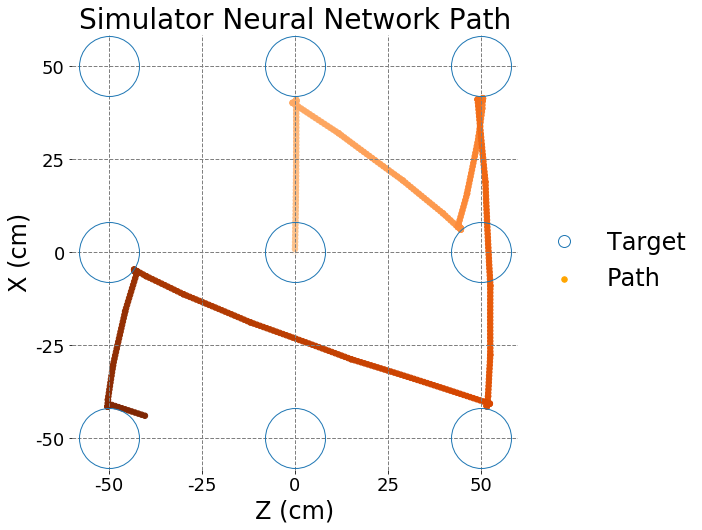

In [299]:
colors = np.linspace(0.3, 1, len(xs))
colors[0] = 0
ax = df.plot.scatter('z', 'x', 
                     c=colors, colormap='Oranges', colorbar=False,
                     s=30, 
                     figsize=(8,8))

tgts = np.array(targets)
ax.plot(tgts[:,0], tgts[:,1], 'o', markerfacecolor='none', markersize=60)

ax.axis('equal');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(color='gray', linestyle='--', linewidth=1);

title_fs = 28
label_fs = 24
tick_fs = 18

ax.set_ylabel('X (cm)', fontsize=label_fs)

ax.set_ylim([-0.6, 0.6]);
ax.set_yticks([-.5, -.25, 0, .25, .5])
ax.set_yticklabels([-50, -25, 0, 25, 50], fontsize=tick_fs);

ax.set_xlabel('Z (cm)', fontsize=label_fs)

ax.set_xlim([-0.6, 0.6]);
ax.set_xticks([-.5, -.25, 0, .25, .5])
ax.set_xticklabels([-50, -25, 0, 25, 50], fontsize=tick_fs);

ax.set_title('Simulator Neural Network Path', fontsize=title_fs);

legend = ax.legend(['Target', 'Path'], bbox_to_anchor=(1, 0.6), fontsize=label_fs, frameon=False)

for legend_handle in legend.legendHandles:
    try:
        legend_handle._legmarker.set_markersize(12)
    except Exception:
        legend_handle.set_color('orange')

fig = plt.gcf()

In [300]:
fig.savefig('snn-path.png', bbox_extra_artists=(legend,), bbox_inches='tight')

In [259]:
class State:

    def __init__(self, name, left_speed, right_speed, 
                 to_left_lo, to_left_hi, 
                 to_right_lo, to_right_hi, 
                 to_forward_lo, to_forward_hi):

        self.name = name
        self.left_speed = left_speed
        self.right_speed = right_speed
        self.to_left_lo = to_left_lo
        self.to_left_hi = to_left_hi
        self.to_right_lo = to_right_lo
        self.to_right_hi = to_right_hi
        self.to_forward_lo = to_forward_lo
        self.to_forward_hi = to_forward_hi

    def transition(self, angle):
        if self.to_left_lo < angle < self.to_left_hi:
            return 'left'
        elif self.to_right_lo < angle < self.to_right_hi:
            return 'right';
        elif self.to_forward_lo < angle < self.to_forward_hi:
            return 'forward';
        else:
            return self.name;


In [280]:
cm_to_m = 0.01
deg_to_rad = pi/180.
rad_to_deg = 180./pi

# Simulate the UGV

dist = 50 * 0.01
targets = [
    (  dist,    0. ),
    (    0.,  dist ),
    (  dist,  dist ),
    ( -dist,  dist ),
    (    0., -dist ),
    ( -dist, -dist ),
    ( -dist,    0. ),
    (  dist, -dist ),
    (    0.,    0. ),
]


dlon_net = nets['dlon']
dlat_net = nets['dlat']
dyaw_net = nets['dyaw']

def simulate(genome, time_stop_ms=30*1000):
    
    wheel_speed, fsm_rad, fsm_factor = genome

    # From fsm.cpp (UPDATE_STEP)
    time_step_ms = 100
    time_ms = 0
    target_idx = 0

    xt = 0.
    zt = 0.
    θt = 0.

    targets_hit = 0
    
    state = 'forward'
    
    fsm = {
        "forward": State(
            "forward", wheel_speed, wheel_speed,
            -2*pi, -fsm_rad, fsm_rad, 2*pi, 1, -1
        ),
        "left": State(
            "left", wheel_speed, -wheel_speed,
            1, -1, 1, -1, -fsm_rad/fsm_factor, 2*pi
        ),
        "right": State(
            "right", -wheel_speed, wheel_speed,
            1, -1, 1, -1, -2*pi, fsm_rad/fsm_factor
        ),
    }
    
    while time_ms < time_stop_ms:
        time_ms += time_step_ms
        
        # Update control based on target

        tx, tz = targets[target_idx]
        target_dist = sqrt((tx - xt)**2 + (tz - zt)**2)

        rx, rz = cos(θt), sin(θt)
        r2tx, r2tz = tx - xt, tz - zt

        a = atan2(r2tz, r2tx) - atan2(rz, rx)
        a -= 2*pi if a > pi else 0
        a += 2*pi if a < -pi else 0
        target_angle = a

        if target_dist < 10*cm_to_m:
            target_idx = (target_idx + 1) % len(targets)
            targets_hit += 1

#         # Wheel speeds are in rads/s
#         if -fsm_rad < target_angle < fsm_rad:
#             wl = wheel_speed
#             wr = wheel_speed
#         elif target_angle < -fsm_rad:
#             wl = wheel_speed
#             wr = 1.-wheel_speed
#         else:
#             wl = 1.-wheel_speed
#             wr = wheel_speed

        state = fsm[state].transition(target_angle)
        wl = scale_speed(fsm[state].left_speed)
        wr = scale_speed(fsm[state].right_speed)

        # Setup control input
        u = np.array([wl, wr, 0.]).reshape(1, 3)
                
        # Simulate UGV
        dlon = unscale_dlon(dlon_net.predict(u)).item()*(time_step_ms/1000)
        dlat = unscale_dlat(dlat_net.predict(u)).item()*(time_step_ms/1000)
        dyaw = unscale_dyaw(dyaw_net.predict(u)).item()*(time_step_ms/1000)
        
#         print(dlon, dlat, dyaw)

        dx = dlon*cos(θt) - dlat*sin(θt)
        dz = dlon*sin(θt) + dlat*cos(θt)

        # Localize
        xt += dx
        zt += dz
        θt += dyaw

#         print(u, xt, zt, θt, targets_hit, target_dist, target_angle)

#     return -2*targets_hit - (1 - (min(target_dist, 1)))
    return {
        'x': xt, 
        'z': zt, 
        'θ': θt, 
        'hits': targets_hit, 
        'dist': target_dist, 
        'angl': target_angle,
        'fit': -2*targets_hit - (1 - (min(target_dist, 1))),
    }


In [244]:
#print(simulate(scale_speed(10), 10*deg_to_rad, 1, 30000))


(0.45691699490032306, -0.46671778430391586, -6.6126657418722585, 8, 0.652226416924271, 2.814506772316828)


In [272]:
print(simulate([10, 10*deg_to_rad, 1]))

{'x': 0.43500665999519084, 'z': -0.45405254145934915, 'θ': -6.752035615574093, 'hits': 7, 'dist': 0.10763568972989393, 'angl': -0.11052729141559914}


In [245]:
from scipy.optimize import differential_evolution

In [279]:
start = time()
res = differential_evolution(simulate, ((0, 10), (0, 30*deg_to_rad), (0.1, 4)), disp=True, maxiter=20)
end = time()
print(end-start, 'seconds')

differential_evolution step 1: f(x)= -14.9133
differential_evolution step 2: f(x)= -14.9133
differential_evolution step 3: f(x)= -14.9133
differential_evolution step 4: f(x)= -14.9133
differential_evolution step 5: f(x)= -14.9147
differential_evolution step 6: f(x)= -14.9147
differential_evolution step 7: f(x)= -14.9185
differential_evolution step 8: f(x)= -14.9185
differential_evolution step 9: f(x)= -14.9185
differential_evolution step 10: f(x)= -14.9185
differential_evolution step 11: f(x)= -14.9185
differential_evolution step 12: f(x)= -14.9185
differential_evolution step 13: f(x)= -14.9185
differential_evolution step 14: f(x)= -16.3608
differential_evolution step 15: f(x)= -16.3608
differential_evolution step 16: f(x)= -16.9196
differential_evolution step 17: f(x)= -16.9196
differential_evolution step 18: f(x)= -16.9196
differential_evolution step 19: f(x)= -16.9196
differential_evolution step 20: f(x)= -16.9196
111.43970203399658 seconds


In [278]:
res

     fun: -16.927854987600487
     jac: array([-0.78511526,  0.        ,  0.        ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 1253
     nit: 20
 success: False
       x: array([9.96156682, 0.20001472, 1.86229592])

In [281]:
simulate(res.x)

{'x': 0.4579939365597141,
 'z': -0.46875305331777456,
 'θ': -0.5476931655382261,
 'hits': 8,
 'dist': 0.08035266632277083,
 'angl': -0.06343988321656624,
 'fit': -16.91964733367723}

In [284]:
res.x[1]*rad_to_deg

10.056652380182527